# Meta-Heuríticas : Trabalho Prático 1 

- Aymê Faustino dos Santos - 4704

O trabalho consiste em implementar duas meta-heuríticas para minimizar duas funções objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

## Bibliotecas Necessarias

In [224]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Funções Objetivo 

### 1.1 Representação da Solução

Vamos utilizar um vetor para representar as variáveis de decisão. Na função objetivo 1 ele terá tamanho dois pois temos duas variaveis de decisão poŕem na função objetivo 2 temos quatro variaveis de decisão sendo assim ele terá tamanho quatro.

### 1.2 Função Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [225]:
def f(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

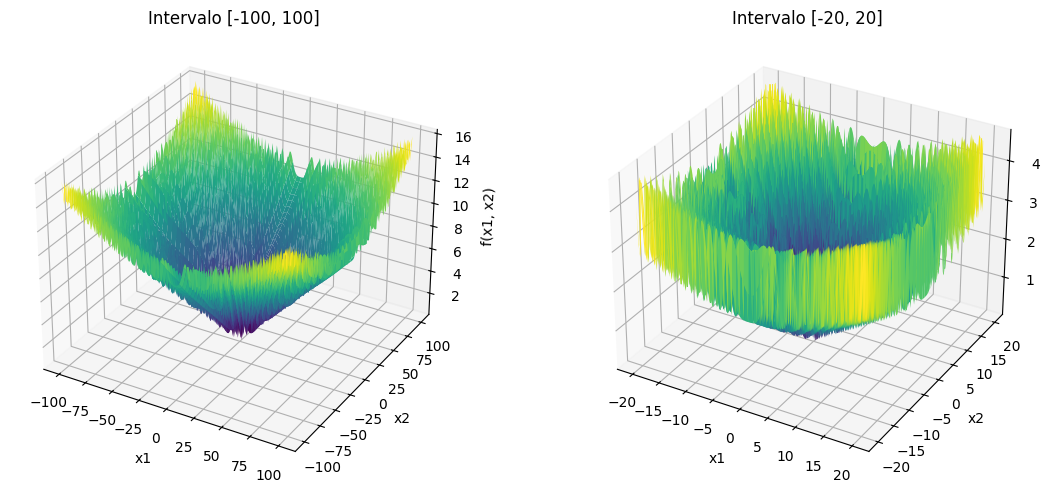

In [226]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(12, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[f([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo [-100, 100]', 'Intervalo [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Função Objetivo 2

1.3.1 Intervalos

a)−10 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 10

b)−2 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 2

In [227]:
def g(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

## 2. Meta-Heuristicas

Para minimiziar as funções objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decisões precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) é uma metaheurística baseada na exploração sistemática de diferentes vizinhanças para encontrar a solução ótima de um problema. A principal motivação do VNS é evitar ficar preso em ótimos locais, expandindo a busca para outras regiões do espaço de soluções.

Ele se baseia na seguinte ideia:
- Se uma solução é um ótimo local em uma vizinhança, ela pode não ser em outra.
- Alternar entre diferentes vizinhanças ajuda a escapar de ótimos locais e encontrar melhores soluções.

VNS é eficiente, simples e versátil, sendo utilizado em problemas de otimização combinatória e contínua.

#### 2.1.1 Pseudocódigo do VNS Básico

Entrada: solução inicial `x`, número máximo de vizinhanças `k_max`, número máximo de iterações

1. x_best ← x

2. Para t = 1 até max_iter faça:

    3. k ← 1

    4. Enquanto k ≤ k_max faça:

        5.   Gerar x' na k-ésima vizinhança de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ← x''

        9.       k ← 1   // reinicia vizinhança

        10.  Senão:

        11.      k ← k + 1
        
12. Retornar x_best



Decisões importantes na implementação do VNS

- Solução Inicial
- Estrutura de Vizinhança
- Condições de Parada
- Estratégia de Busca Local
- Quantidade de vizinhanças (k_max)

### 2.1.2 Solução Inicial

Como a solução será representada por meio de um vetor, uma estratégia simples e muito utilizada na inicialização é a de gerar uma solução aleatória preenchendo as posições do vetor com valores que estejam dentro de um intervalo pré definido para cada variável.

### 2.1.3 Metodo de busca local

#### Hill Climbing


O Hill Climbing é um método de busca local que usa um procedimento de melhora iterativa, ou seja, a cada iteração ele tenta melhorar a solução corrente sendo portanto um algoritmo gulosa que não aceita piora. Seu algorimo para problemas de minimização é:

```
s --> solução candidata inicial
repita 
    r = perturba(copia(s)) --> faz uma perturbação pequena na solução corrente para encontrar um nova solução
    se qualidade(r)<qualidade(s) então --> compara o valor da função objetivo na nova solução com o da solução corrente
        s = r --> se melhoran atualiza solucao corrente
    --> se não melhora não faz nada
até condição de parada
retorne s
```

Analisando o algoritmo é preciso definir:
* Como obter solução Inicial
* Como pertubarr uma solução
* Condição de Parada

#### Solução Inicial

Como o Hill Climbing vai ser utilizado como uma etapa do VNS a solução canditada vai ser definida no VNS.

#### Pertubar Solução

A característica do Hill Climbing é de fazer pequenas pertubações na solução corrente e isso pode ser feito adicionando um pequeno valor aleatório, chamado de ruído, em cada variável de decisão. Entretanto, saber se é uma pertubação pequena é um desafio. Uma possível estratégia é fazer um ruído de no máximo 5% em relação ao valor corrente.

Será utilizado um algoritmo que recebe o intervalo da porcentagem do ruído como parâmetro e escolhe aleatoriamente uma valor desse intervalo. Isso permite que o método seja generalista uma vez que poderá ser usado também para fazer perturbações maiores. O pseudocódigo do algoritmo é:

```
min = valor minimo desejado para um elemento do vetor
max = valor minimo desejado para um elemento do vetor

min_ruido = porcentagem mínima do ruído
max_ruido = porcentagem máxima do ruído

v = quantidade de variaveis de decisao
vetor[v] = solucao a ser perturbada

p = probabilidade de adicionar ruído em um elemento do vetor (normalmente 1)

for i from 1 to v do --> para cada elemento do vetor de variáveis
    if p ≥ numero aleatorio [0.0,1.0] entao
        do
            porcentagem_ruido = numero aleatorio [min_ruido, max_ruido]
            ruido = solucao[i] * porcentagem_ruido
            r = numero aleatorio [-ruido,ruido] --> pode ser um valor positivo ou negativo
        while min ≤ vetor[i] + r ≤ max --> conferir se continua atendendo às restrições após a perturbação
        vetor[i] = vetor[i] + r
return vetor
```

Para as pequenas pertubações vamos utilizar um ruido de 3% a 5%

#### Condição de parada

Existem várias estratégias que podem ser adotadas como condição de parada, como:
* certa quantidade de iterações realizadas
* certa quantidade de avaliações da função objetivo realizadas
* limite de tempo gasto
* certo número de iterações sme melhoria da solução atual

Na implementação do Hill Climbing o critério de parada será realizar 5 iterações sem melhoria da solução atual 

### 2.1.4 Gerar solução inicial aleatoria

In [228]:
def solucaoInicialAleatoria(min, max, qtdVariaveisDecisao=2):
    v = []
    for i in range(qtdVariaveisDecisao):
        v.append(random.uniform(min[i], max[i]))
    return np.array(v)

### 2.1.5 Gerar pertubações 

In [229]:
def pertubacao(solucao, min, max, min_ruido, max_ruido):
    nova_solucao = []
    for i, valor in enumerate(solucao):
        ruido = random.uniform(min_ruido, max_ruido)
        # Perturbação ajustada para o valor de cada variável
        perturbacao = valor + ruido * (random.uniform(min[i], max[i]) - valor)  # Para cada dimensão
        nova_solucao.append(perturbacao)
    return np.array(nova_solucao)

### 2.1.6 Hill Climbing 

In [230]:
def hillClimbing(solucao, funcaoObjetivo, min, max):
    min_ruido = 0.03
    max_ruido = 0.05
    semMudanca = 0

    while True:
        novaSolucao = pertubacao(solucao.copy(), min, max, min_ruido, max_ruido)
        
        if funcaoObjetivo(novaSolucao) < funcaoObjetivo(solucao): 
            solucao = novaSolucao
            semMudanca = 0
        else:
            semMudanca += 1
            
        if semMudanca == 5:
            break

    return solucao

### 2.1.7 VNS

In [231]:
def vns(funcaoObjetivo, min, max, qtdVariaveisDecisao=2, k_max=5, max_iter=100):
    solucao_inicial = solucaoInicialAleatoria(min, max, qtdVariaveisDecisao)
    
    solucao_corrente = solucao_inicial
    melhor_solucao = solucao_inicial
    melhor_valor = funcaoObjetivo(melhor_solucao)

    iteracoes_sem_melhora = 0

    while iteracoes_sem_melhora < 5:
        k = 1
        while k <= k_max:
            nova_solucao = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)
            nova_solucao = hillClimbing(nova_solucao, funcaoObjetivo, min, max)
            valor_nova_solucao = funcaoObjetivo(nova_solucao)

            if valor_nova_solucao < melhor_valor:
                solucao_corrente = nova_solucao
                melhor_valor = valor_nova_solucao
                melhor_solucao = nova_solucao
                k = 1
                iteracoes_sem_melhora = 0
            else:
                k += 1

        if k > k_max:
            solucao_corrente = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)

        iteracoes_sem_melhora += 1

    return melhor_solucao

#### Intervalo a

In [232]:
# Função para executar o VNS
vns_1a = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_a[0]  # Definindo o limite inferior para x1 e x2
max = intervalo1_a[1]  # Definindo o limite superior para x1 e x2

for i in range(30):    
    solucao = vns(f, [min, min], [max, max])  # Solução gerada pelo VNS
    vns_1a['x1'].append(solucao[0])  # Adiciona o valor de x1
    vns_1a['x2'].append(solucao[1])  # Adiciona o valor de x2
    vns_1a['f(x1,x2)'].append(f(solucao))  # Calcula e armazena o valor da função objetivo
    
print(vns_1a)

{'x1': [np.float64(0.01343323966075638), np.float64(0.6012918521882717), np.float64(0.475949373391873), np.float64(-0.2602962925774568), np.float64(0.9933144430506007), np.float64(-0.05150112832661191), np.float64(0.4203759525750764), np.float64(0.0664207046801577), np.float64(0.0025053405936699136), np.float64(-0.0073541958343956715), np.float64(0.9249794767416983), np.float64(-0.5777180707546127), np.float64(0.6351106190914488), np.float64(0.16985806632979783), np.float64(0.8052890478663741), np.float64(0.0006316825463228426), np.float64(0.04354597724957099), np.float64(-0.4540175488052238), np.float64(-0.9266699527043194), np.float64(0.055090974886514044), np.float64(0.4667168692797108), np.float64(-0.04417633373217078), np.float64(-0.24206535005318963), np.float64(0.6058975435899518), np.float64(0.31012518067630745), np.float64(-0.042964623085611), np.float64(0.8785796879120289), np.float64(-0.0018124958890493037), np.float64(0.9709702927417303), np.float64(-0.021737774381051844)],

#### Função Auxiliar Para Plotar um Gráfico com o Valor Final da Função Objetivo em cada Iteração

In [233]:
def objetivoFinalCadaIteracao(valores, target, titulo):
    plt.figure(figsize=(15, 8))
    min_index = np.argmin(valores[target])  # Encontra o índice do melhor valor (mínimo)
    
    # Plotar os valores da função objetivo
    plt.plot(range(1, len(valores[target]) + 1), valores[target], linestyle='-', label=target, color='lightgreen')
    
    # Adicionar pontos no gráfico e exibir os valores
    for i in range(len(valores[target])):
        if i == min_index:
            # Para o melhor valor (mínimo), destaca o ponto
            plt.scatter(i + 1, valores[target][i], color='lightgreen', marker='o')
            plt.text(i + 1, valores[target][i], f'{valores[target][i]:.6f}', fontsize=12, fontweight='bold', ha='center', va='bottom', color='purple')
            plt.text(i + 1, valores[target][i], f'x1 = {valores["x1"][i]:.4f} \nx2 = {valores["x2"][i]:.4f}', fontsize=10, fontweight='bold', ha='center', va='top', color='black')
        else:
            # Para os outros valores, não destaca o ponto
            plt.scatter(i + 1, valores[target][i], color='lightgreen', marker='o')
            plt.text(i + 1, valores[target][i], f'{valores[target][i]:.6f}', fontsize=8, ha='center', va='center', color='black')
    
    # Configurações do gráfico
    plt.xticks([i for i in range(1, len(valores[target]) + 1)])
    plt.xlabel('Execuções')  # Altere para "Execuções" ou o que fizer sentido
    plt.ylabel('Valor da função objetivo')
    plt.title(f'Valor Final da Função Objetivo em cada Execução do {titulo}')
    plt.legend()
    plt.grid(True)
    plt.show()


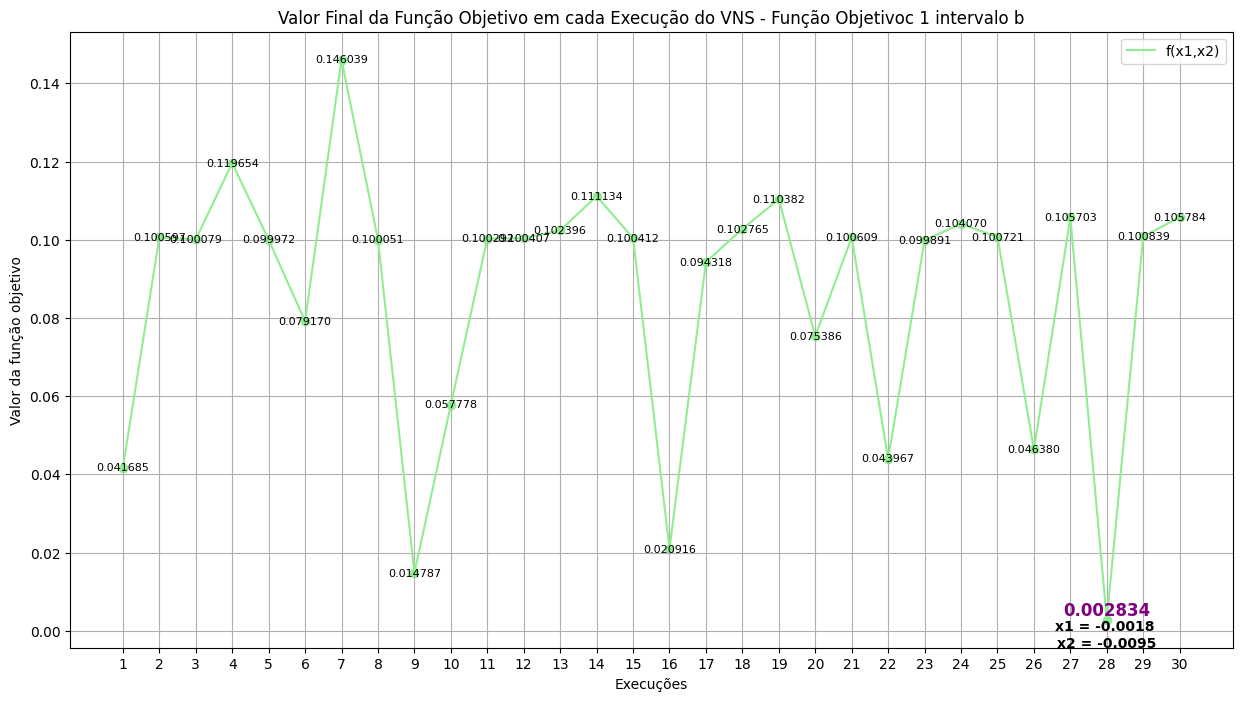

In [234]:
objetivoFinalCadaIteracao(vns_1a, 'f(x1,x2)', 'VNS - Função Objetivoc 1 intervalo b')

#### Intervalo B

In [ ]:
vns_1b = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_b[0] 
max = intervalo1_b[1] 

for i in range(30):    
    solucao = vns(f, [min, min], [max, max])
    vns_1b['x1'].append(solucao[0]) 
    vns_1b['x2'].append(solucao[1])  
    vns_1b['f(x1,x2)'].append(f(solucao)) 
    
print(vns_1b)

{'x1': [np.float64(-0.05758821175581774), np.float64(0.1346215723223918), np.float64(-0.530459179994943), np.float64(-0.9012394559740666), np.float64(-0.0362372883277379), np.float64(0.9548420386379146), np.float64(-0.8794378602636456), np.float64(0.21229768215765907), np.float64(-0.4290514719752442), np.float64(-0.2324145404734168), np.float64(-0.7827609124015049), np.float64(-0.591597523423667), np.float64(0.36648862809643357), np.float64(-0.152123360181618), np.float64(0.023061691962874997), np.float64(0.9438053875898118), np.float64(-0.016057944434564653), np.float64(-0.057489038257964975), np.float64(0.5666463916143744), np.float64(0.6737103976813714), np.float64(0.8282622971501757), np.float64(-0.03840903200254964), np.float64(0.4793313039610699), np.float64(-0.6866923541950491), np.float64(0.8951794117883999), np.float64(0.031090783907266994), np.float64(0.04030676463052851), np.float64(-0.24460756489657454), np.float64(-0.3918381978390985), np.float64(0.34768107218104505)], 'x2

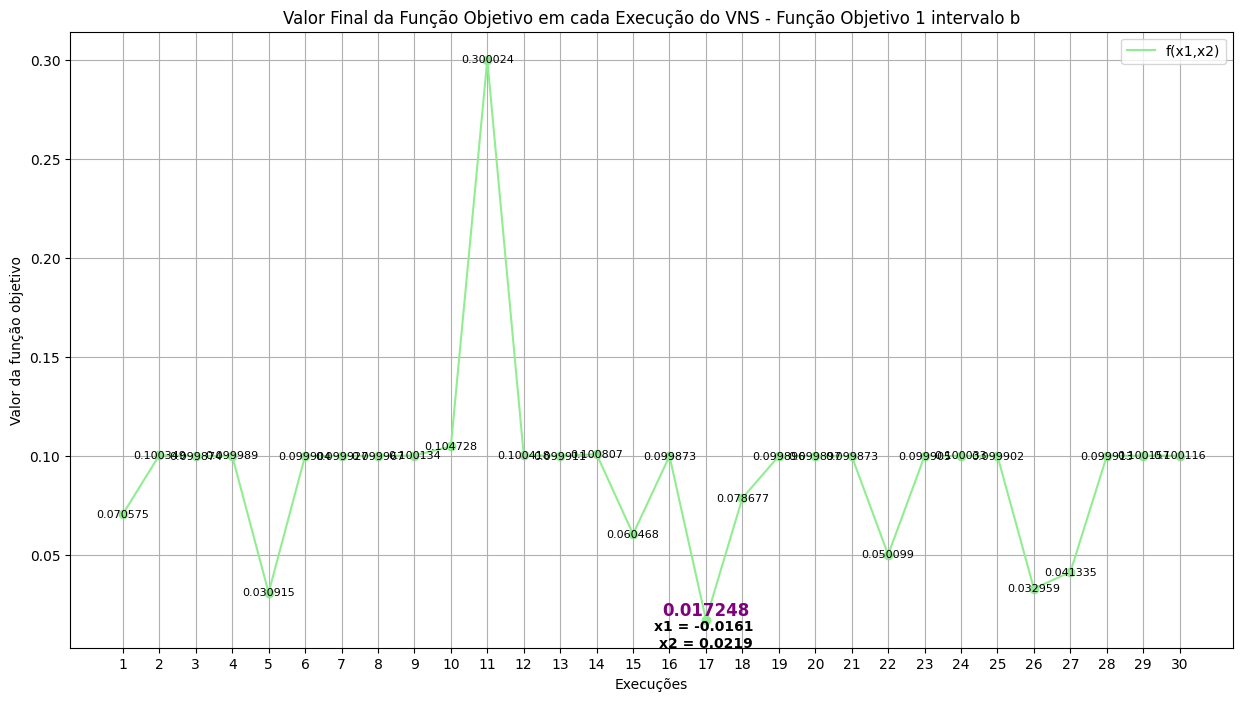

In [236]:
objetivoFinalCadaIteracao(vns_1b, 'f(x1,x2)', 'VNS - Função Objetivo 1 intervalo b')

#### Função para exibir o boxplot

In [ ]:
def exibirBoxplot(resultadosComparar, titulo, cor):
    fig, ax = plt.subplots(figsize=(6, 4))

    sns.boxplot(y=resultadosComparar, ax=ax, color=cor)

    ax.set_title('VNS', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valor da Função Objetivo', fontsize=10)

    fig.suptitle(titulo, fontsize=12, fontweight='bold')

    plt.show()

    #quando tiver os dois algoritmos 

    """def exibirBoxplot(resultadosComparar, titulo, cor):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(y=resultadosComparar[0], ax=ax1, color=cor)
    sns.boxplot(y=resultadosComparar[1], ax=ax2, color=cor)

    ax1.set_title('SA', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Valor da Função Objetivo', fontsize=10)
    ax2.set_title('ILS', fontsize=10, fontweight='bold')
    
    fig.suptitle(titulo, fontsize=10, fontweight='bold')

    plt.show()"""

#### Função para gerar as estatisticas

In [238]:
def estatisticas(resultadosComparar, nome_funcao_objetivo):
    estatisticas = {'algoritmo': [], 'minimo': [], 'maximo': [], 'media': [], 'dp': [], 'x_do_minimo': [], 'y_do_minimo': []}
   
    algoritmos = ['VNS']  # Aqui só tem VNS, mas depois adicione SA se necessário

    for i, resultado in enumerate(resultadosComparar):
        objetivo = resultado[nome_funcao_objetivo]
        estatisticas['algoritmo'].append(algoritmos[i])
        estatisticas['minimo'].append(np.min(objetivo))
        estatisticas['maximo'].append(np.max(objetivo))
        estatisticas['media'].append(np.mean(objetivo))
        estatisticas['dp'].append(np.std(objetivo))
        indice_minimo = np.argmin(objetivo)
        estatisticas['x_do_minimo'].append(resultado['x1'][indice_minimo])  # Para x1
        estatisticas['y_do_minimo'].append(resultado['x2'][indice_minimo])  # Para x2
    
    return pd.DataFrame(estatisticas)

  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.017248  0.300024  0.092929  0.045994    -0.016058     0.021911


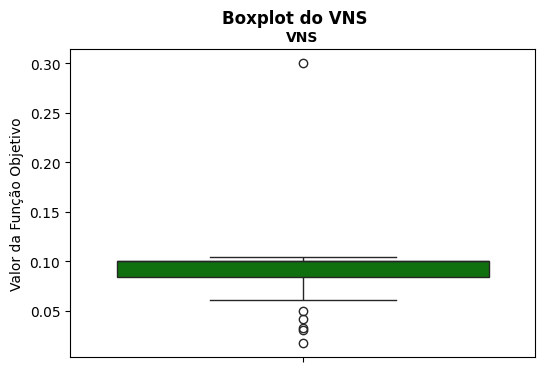

In [ ]:
# Calcular as estatísticas para o VNS e o SA posteriormente
estatisticas_vns = estatisticas([vns_1b], 'f(x1,x2)')

print(estatisticas_vns)

#resultadosComparar = [vns_1a['f(x1,x2)'], sa_1a['f(x,y)']]
exibirBoxplot(vns_1b['f(x1,x2)'], 'Boxplot do VNS', 'green')